<center><h2>ZS - Záverečný projekt</h2></center>

Úloha:

Zo serveru https://www.kaggle.com/datasets vyberte a spracujte ľubovoľný súbor.

1.      Zo súboru vygeneruje rozhodovací strom (min. 8 listov) (je možno použiť aj inú metódu, ktorá priamo vygeneruje pravidlá)

2.      Prepíšte (automaticky) rozhodovací strom do pravidiel

3.      Upravte pravidlá pre použitie do Clips

4.      Doplňte menu pre používateľskú prácu s vytvoreným expertným systémom

Čo je potrebné odovzdať:

1.      Odkaz na vybraný dataset (ako text pri odovzdaní zadania)

2.      Odkaz na vytvorený Jupyter Notebook (ako text pri odovzdaní zadania)

3.      Súbor .clp, t.j. vytvorený expertný systém (ako odovzdaný súbor)

<strong>Odkaz na dataset</strong> - https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv

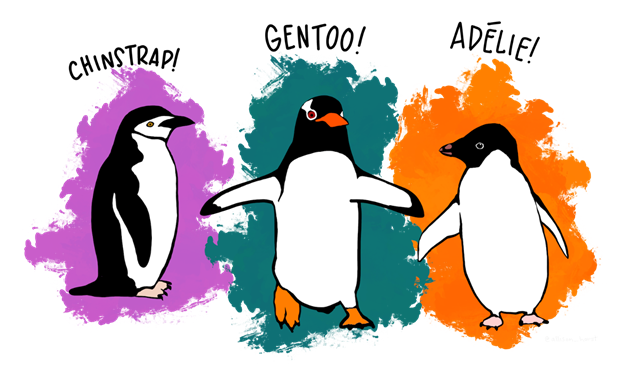

In [1]:
from IPython.display import Image
Image("penguins.png")

<strong>Importovanie knižníc.</strong>

In [2]:
import numpy as np
import pandas as pd

<strong>Načítame si súbor "penguins.csv" do pandas dataframu a vypíšeme prvých 5 a posledných 5 záznamov z DF.</strong>

V prvom stĺpci - "species" - sa nachádzajú jednotlivé druhy tučniakov. V druhom stĺpci - "island" - sa nachádzajú názvy ostrovov, kde tieto tučniaky žijú. V treťom stĺpci - "culmen_length_mm" - sú údaje o dĺžke zobáka. V štvrtom stĺpci - "culmen_depth_mm" - sú údaje o hĺbke zobáka. V piatom stĺpci - flipper_length_mm - sú informácie o dĺžke plutvy v milimetroch. V šiestom stĺpci - "body_mass_g" - sú uvedné váhy v gramoch. V poslednom stĺpci - "sex" - sa nachádzajú údaje o pohlaví (male = samec, female = samica).

In [3]:
df = pd.read_csv("penguins.csv",sep=';')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


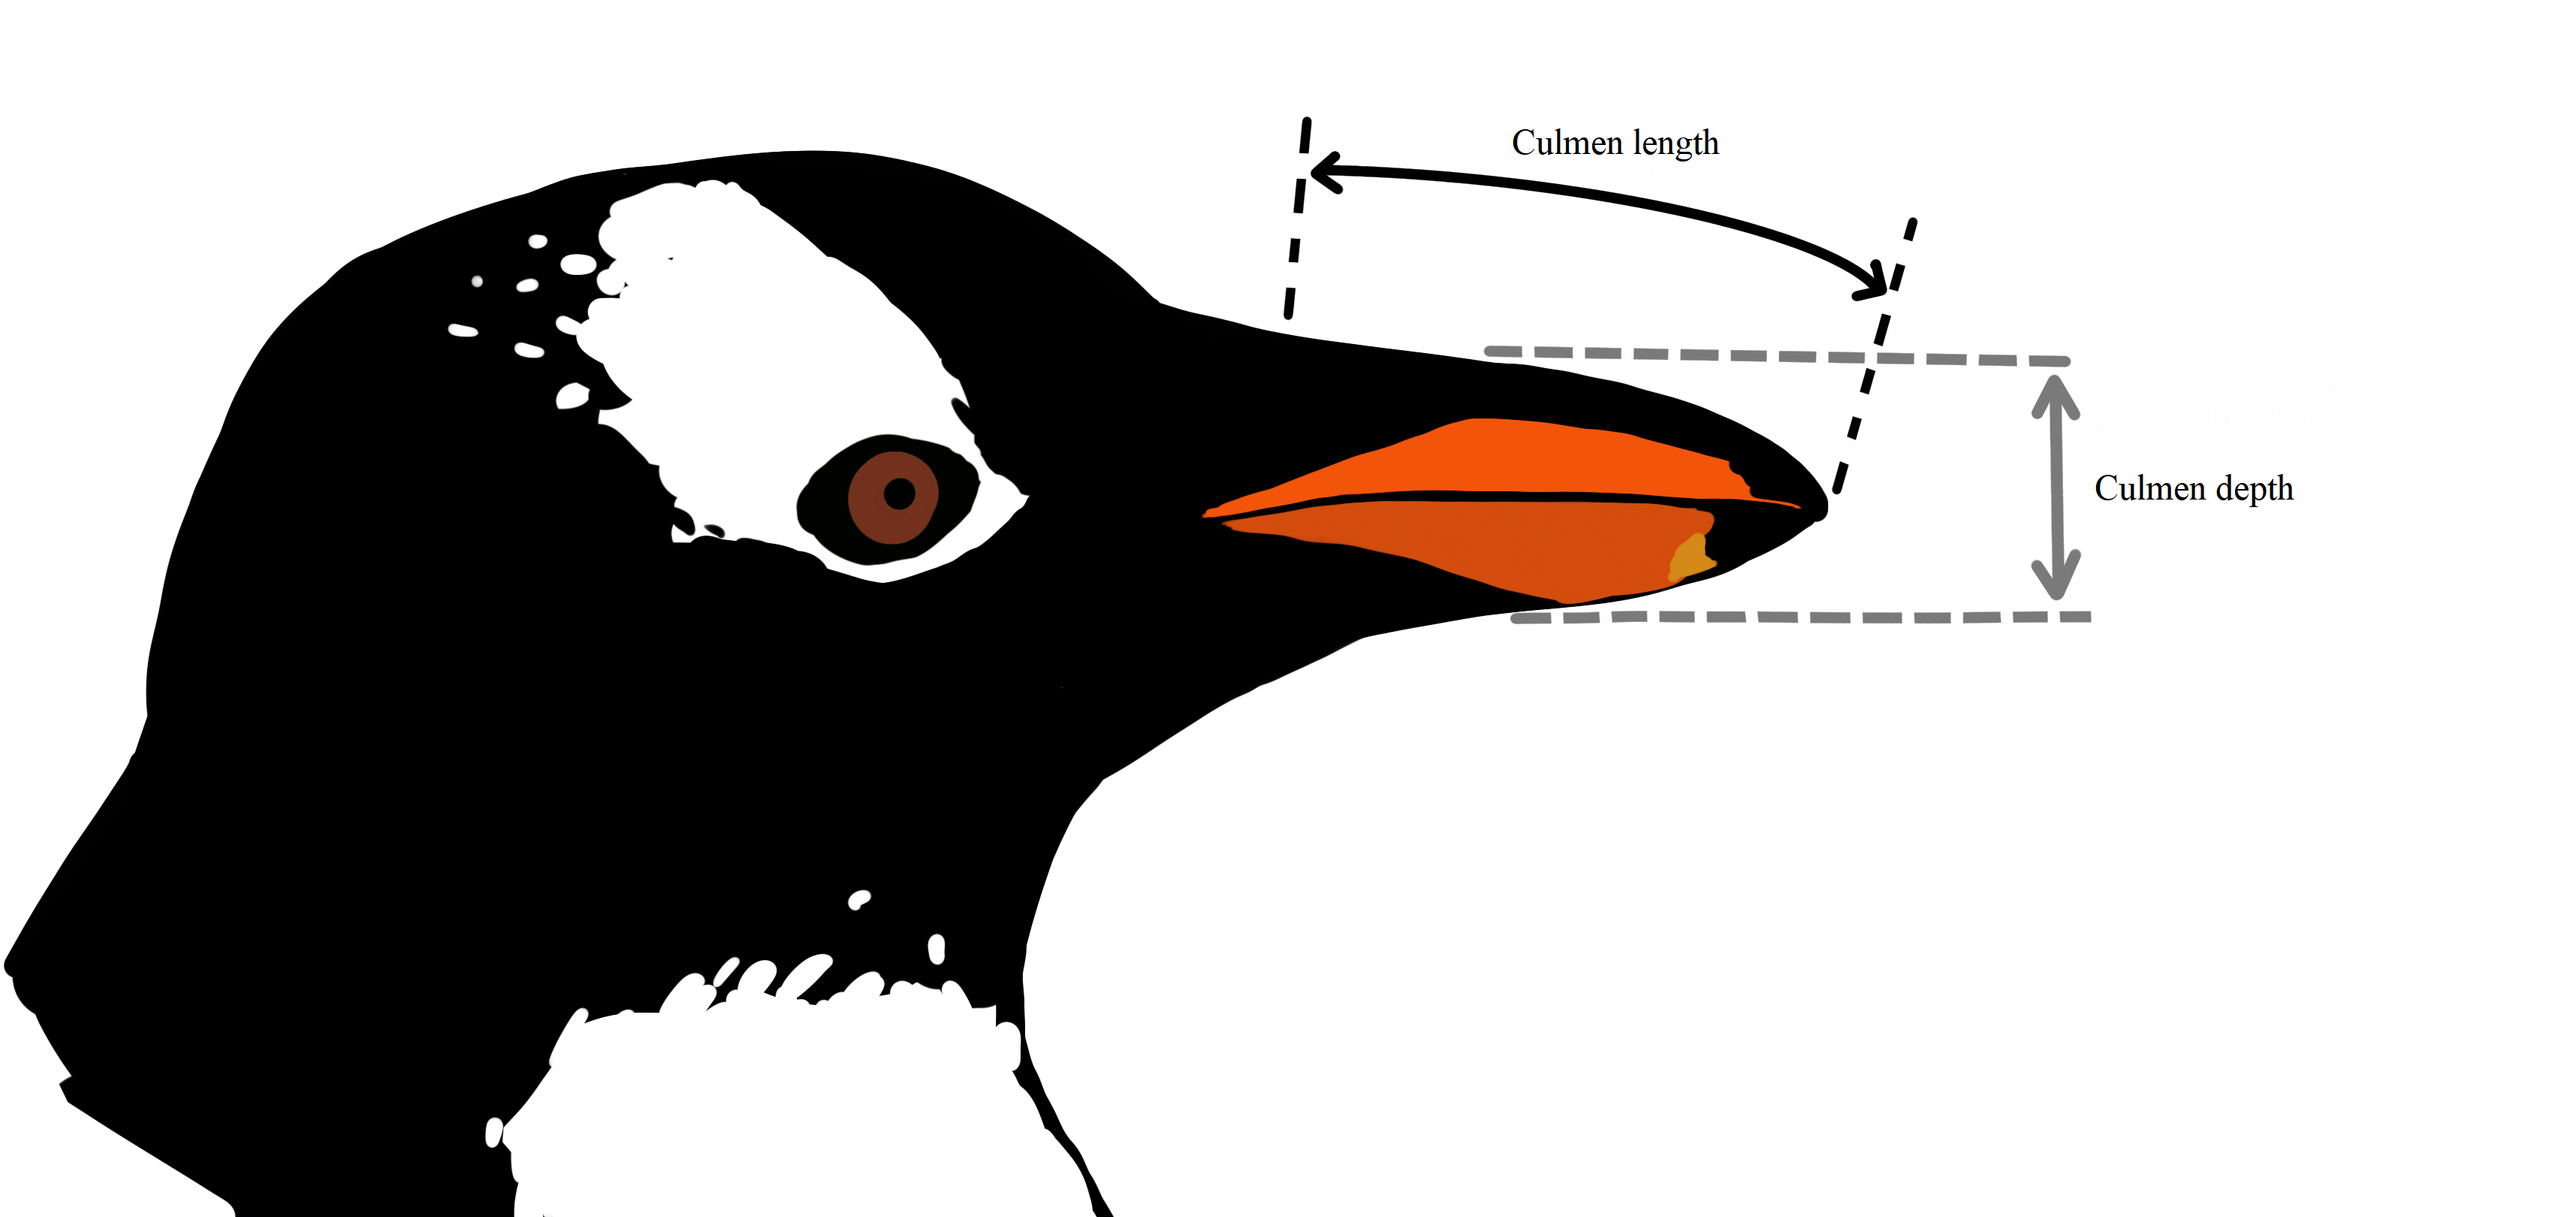

In [4]:
Image("culmen_length_depth.png")

<strong>Zistíme unikátne hodnoty.</strong>

In [5]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

<strong>Zistíme počet nulových hodnôt v jednotlivých stĺpcoch.<strong>

In [8]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<strong>Zmažeme nulové hodnoty.</strong>

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<strong>V stĺpci "sex" sa nachádza aj neznáma hodnota ".". Tento riadok zmažeme.</strong>

In [11]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df.drop(336)

In [13]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

<h1>Vizualizácia dát</h1>

S pomocou funkcie value_counts() sme zistili počet tučniakov v jednotlivých kategóriach.Pre vizualizáciu sme používali knižnicu "seaborn". Pomocou tejto knižnice vizualizujeme údaje z DF na základe stĺpca "species".

<AxesSubplot:xlabel='species', ylabel='count'>

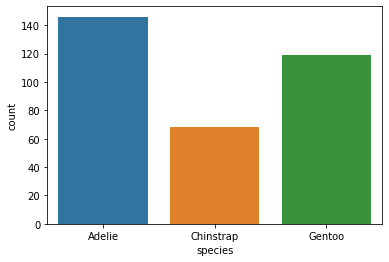

In [15]:
import seaborn as sns
sns.countplot(x='species',data=df)

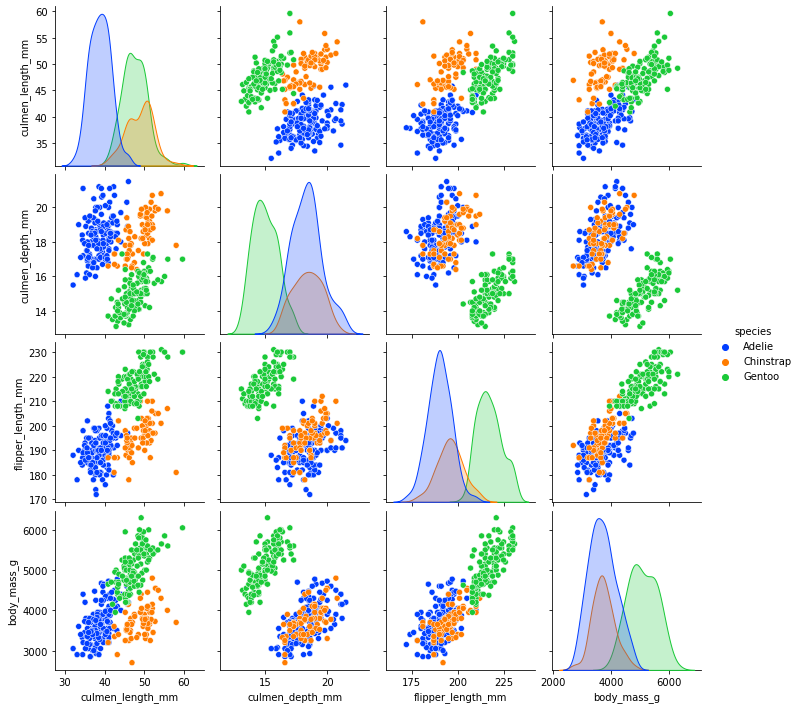

In [16]:
sns.pairplot(data=df, hue='species', palette= "bright")

<h1>Trénovanie dát</h1>


Aby sme mohli používať DecisionTreeClassifier, musíme kategorické dáta prehodiť/pretransformovať na číselné. Spravíme to s pomocou funkcie <strong>get_dummies.</strong>

In [17]:
df = pd.get_dummies(df,columns=['island','sex'],drop_first=False)
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

Pomocou funkcie train_test_split() rozdelíme údaje na trénovacie a testovacie. Dôvody rozdelenia: Na trenovacích dátach učíme neurónovú sieť. Na overenie správnosti/presnosti natrénovania NS používame testovacie dáta.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm',
              'body_mass_g','island_Biscoe','island_Dream','island_Torgersen',
              'sex_FEMALE','sex_MALE']], df['species'], test_size = 0.2) # 80% training and 20% test

In [20]:
clf = DecisionTreeClassifier() #max_depth

In [21]:
clf = clf.fit(X_train,y_train) # trenovanie

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print("Presnosť: ",np.round(metrics.accuracy_score(y_test,y_pred) * 100,1), "%") # presnost

Presnosť:  100.0 %


<h1>Rozhodovací strom</h1>

In [24]:
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image

In [25]:
vlastnosti = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm',
              'body_mass_g','island_Biscoe','island_Dream','island_Torgersen',
              'sex_FEMALE','sex_MALE']

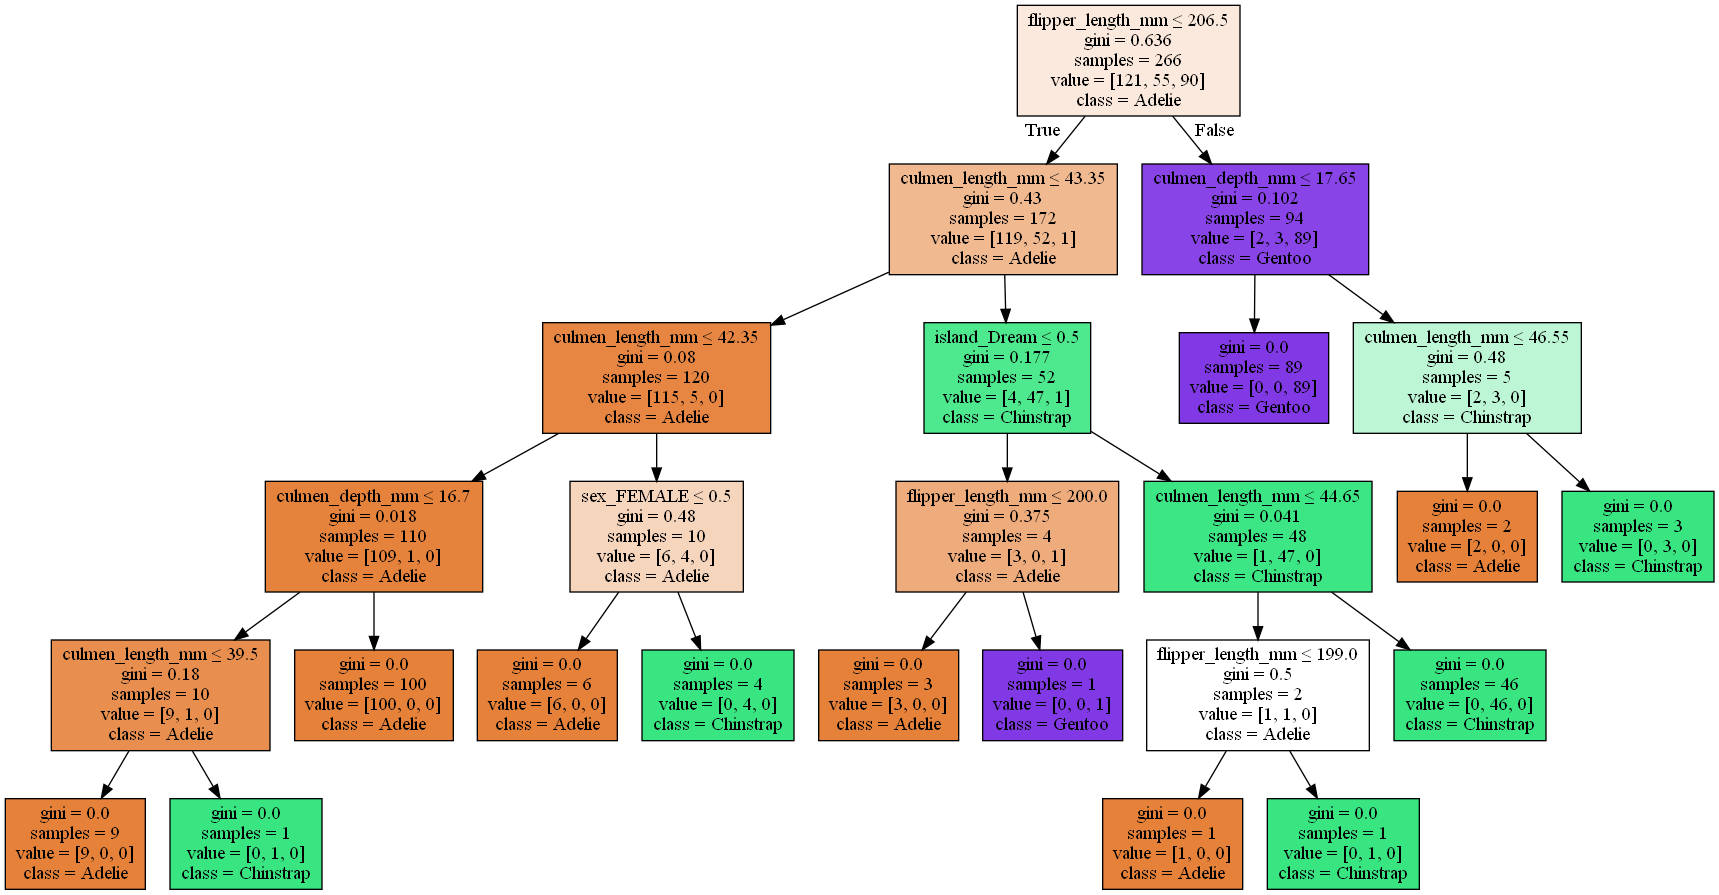

In [26]:
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=False,
                special_characters=True,feature_names=vlastnosti, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("rozhodovaci_strom.png")
Image(graph.create_png())

<h1>Pravidlá</h1>

Počet koncových uzlov = x -- > počet pravidiel = x

In [27]:
clf.tree_.n_leaves

13

In [28]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"(<= ?{name} {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"(> ?{name} {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]}"
        rules += [rule]
        
    return rules

In [29]:
rules = get_rules(clf, vlastnosti,df.species.unique())
number = 1
for r in rules:
    print(number,")",r,"\n")
    number+=1

1 ) if (<= ?flipper_length_mm 206.5) and (<= ?culmen_length_mm 43.35) and (<= ?culmen_length_mm 42.35) and (> ?culmen_depth_mm 16.7) then class: Adelie 

2 ) if (> ?flipper_length_mm 206.5) and (<= ?culmen_depth_mm 17.65) then class: Gentoo 

3 ) if (<= ?flipper_length_mm 206.5) and (> ?culmen_length_mm 43.35) and (> ?island_Dream 0.5) and (> ?culmen_length_mm 44.65) then class: Chinstrap 

4 ) if (<= ?flipper_length_mm 206.5) and (<= ?culmen_length_mm 43.35) and (<= ?culmen_length_mm 42.35) and (<= ?culmen_depth_mm 16.7) and (<= ?culmen_length_mm 39.5) then class: Adelie 

5 ) if (<= ?flipper_length_mm 206.5) and (<= ?culmen_length_mm 43.35) and (> ?culmen_length_mm 42.35) and (<= ?sex_FEMALE 0.5) then class: Adelie 

6 ) if (<= ?flipper_length_mm 206.5) and (<= ?culmen_length_mm 43.35) and (> ?culmen_length_mm 42.35) and (> ?sex_FEMALE 0.5) then class: Chinstrap 

7 ) if (> ?flipper_length_mm 206.5) and (> ?culmen_depth_mm 17.65) and (> ?culmen_length_mm 46.55) then class: Chinstrap 

<h1>Clips</h1>

In [30]:
df["culmen_length_mm"].max()

59.6

In [31]:
df["culmen_depth_mm"].max()

21.5

In [32]:
df["flipper_length_mm"].max()

231.0

In [33]:
df["body_mass_g"].max()

6300.0

In [34]:
# island_Biscoe, island_Dream, island_Torgersen = 0,1

In [35]:
# sex_FEMALE, sex_MALE = 0,1

In [36]:
df.head(2)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0


In [37]:
df[146:148]

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
152,Chinstrap,46.5,17.9,192.0,3500.0,0,1,0,1,0
153,Chinstrap,50.0,19.5,196.0,3900.0,0,1,0,0,1


In [38]:
df[214:216]

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
220,Gentoo,46.1,13.2,211.0,4500.0,1,0,0,1,0
221,Gentoo,50.0,16.3,230.0,5700.0,1,0,0,0,1
